In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../../data/covid-dunia/raw/covid_19_data.csv')
data.head()

,version https://git-lfs.github.com/spec/v1
0,oid sha256:b64303296f617984bd13fecf69a5250b26f...
1,size 22535273


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


Perlu convert ke datetime

In [4]:
data.duplicated().sum()

0

In [5]:
data.isna().sum()

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [7]:
data_cp = data.copy()

# convert to datetime
data_cp['ObservationDate'] = pd.to_datetime(data_cp['ObservationDate'])

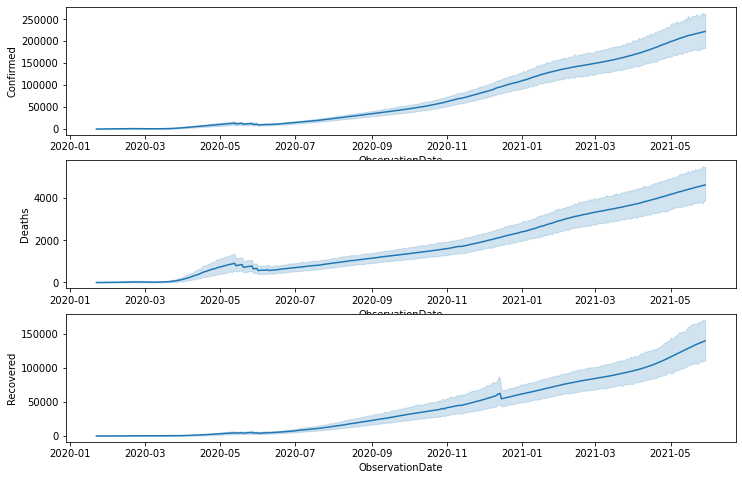

In [22]:
data_ts = data_cp.copy()

# line plot
fig, ax = plt.subplots(3, figsize=(12,8))
sns.lineplot(data=data_ts, x='ObservationDate', y='Confirmed', ax=ax[0])
sns.lineplot(data=data_ts, x='ObservationDate', y='Deaths', ax=ax[1])
sns.lineplot(data=data_ts, x='ObservationDate', y='Recovered', ax=ax[2])
plt.show()

<AxesSubplot:xlabel='Country/Region', ylabel='Number of Deaths'>

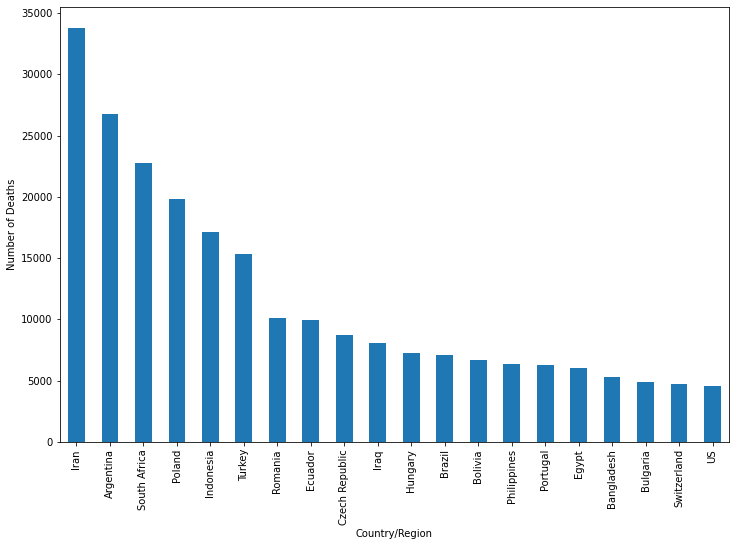

In [35]:
plt.ylabel('Number of Deaths')
data_ts.groupby("Country/Region")["Deaths"].mean().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(12,8))

<AxesSubplot:xlabel='Country/Region', ylabel='Number of Confirmed Cases'>

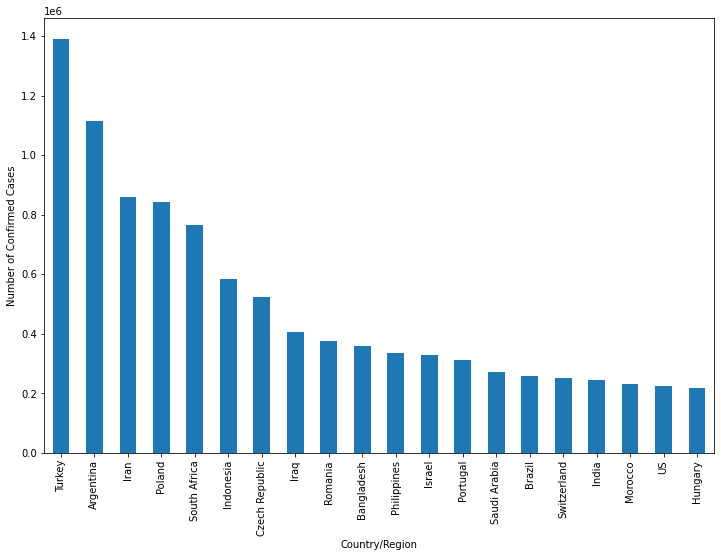

In [34]:
plt.ylabel('Number of Confirmed Cases')
data_ts.groupby("Country/Region")["Confirmed"].mean().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(12,8))

<AxesSubplot:xlabel='Country/Region', ylabel='Number of Cases'>

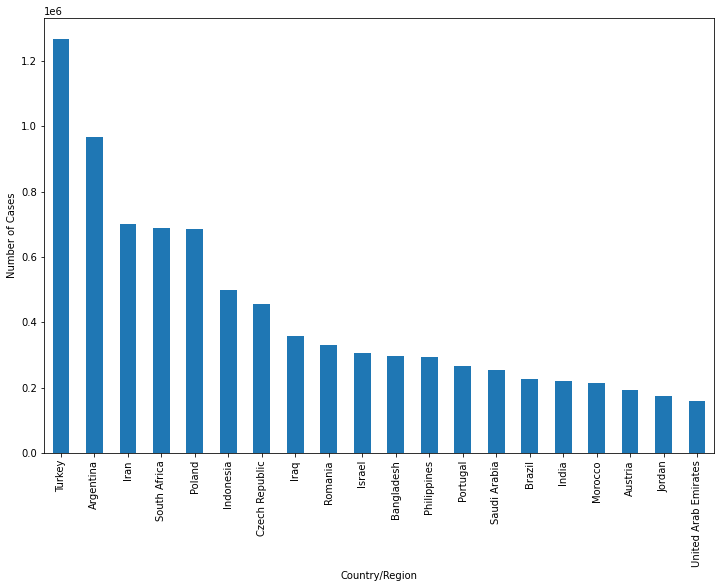

In [33]:
plt.ylabel('Number of Cases')
data_ts.groupby("Country/Region")["Recovered"].mean().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(12,8))

# Mobilitas

In [38]:
data_mobilitas = pd.read_csv("../../data/mobilitas/raw/Global_Mobility_Report.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_1924\3511949381.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_mobilitas = pd.read_csv("../../data/mobilitas/raw/Global_Mobility_Report.csv")


In [39]:
data_mobilitas.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
10225244,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-06-03,NaN,NaN,NaN,NaN,130.0,NaN
10225245,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-06-06,NaN,NaN,NaN,NaN,113.0,NaN
10225246,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-06-07,NaN,NaN,NaN,NaN,145.0,NaN
10225247,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-06-08,NaN,NaN,NaN,NaN,139.0,NaN
10225248,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-06-09,NaN,NaN,NaN,NaN,123.0,NaN


In [40]:
data_mobilitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10225249 entries, 0 to 10225248
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline 

<AxesSubplot:xlabel='country_region', ylabel='retail & recreation'>

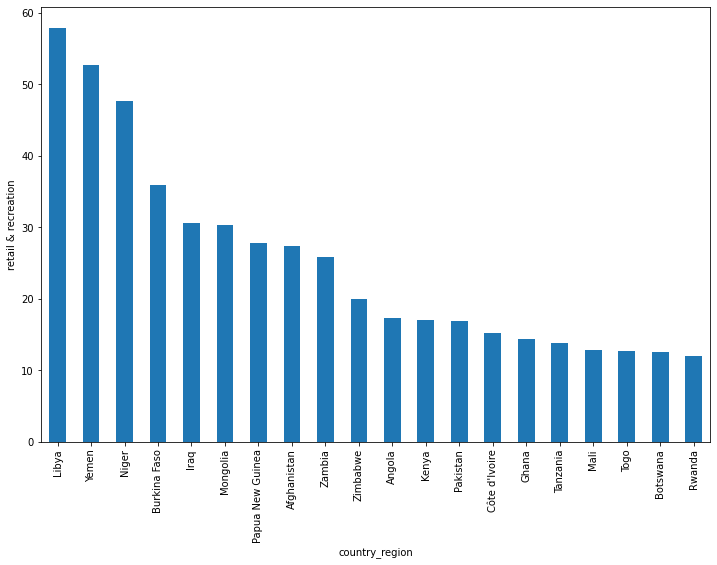

In [43]:
plt.ylabel("retail & recreation")
data_mobilitas.groupby("country_region")[
    "retail_and_recreation_percent_change_from_baseline"].mean().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(12,8))

<AxesSubplot:xlabel='country_region', ylabel='grocery & pharmacy'>

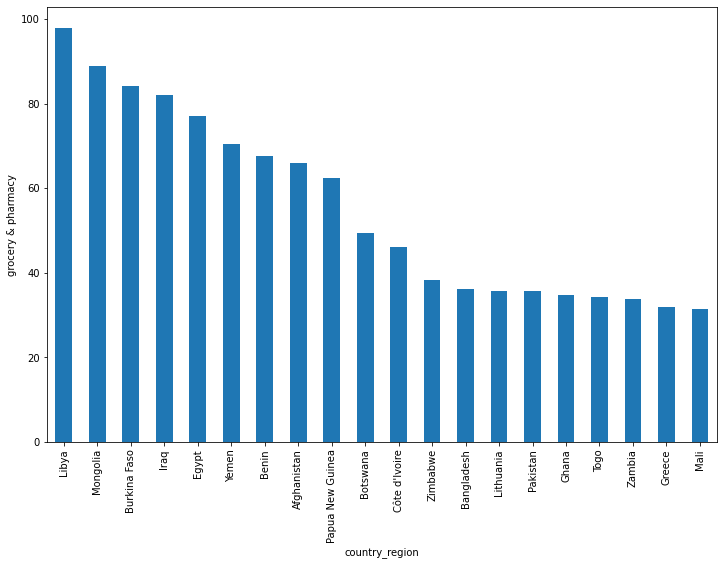

In [44]:
plt.ylabel("grocery & pharmacy")
data_mobilitas.groupby("country_region")[
    "grocery_and_pharmacy_percent_change_from_baseline"].mean().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(12,8))

<AxesSubplot:xlabel='country_region', ylabel='workplaces_percent_change_from_baseline'>

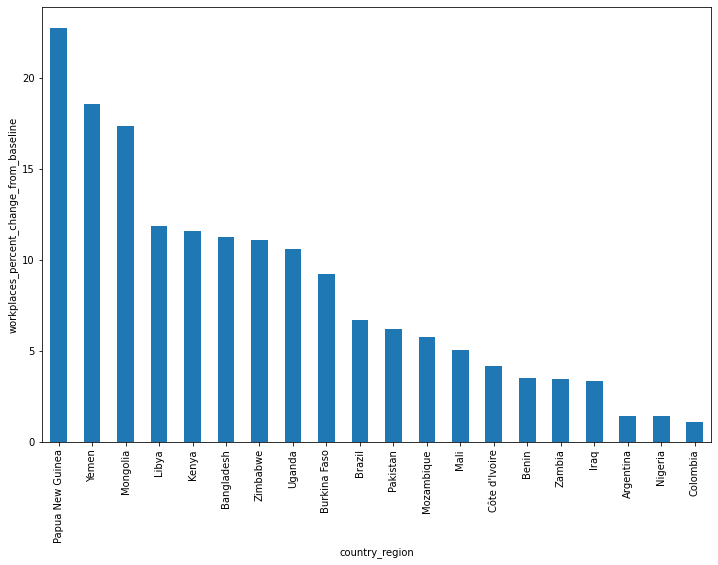

In [45]:
plt.ylabel("workplaces_percent_change_from_baseline")
data_mobilitas.groupby("country_region")[
    "workplaces_percent_change_from_baseline"].mean().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(12,8))

In [46]:
data_mobilitas.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [50]:
retail_mean = data_mobilitas.groupby("country_region")["retail_and_recreation_percent_change_from_baseline"].mean()
grocery_mean = data_mobilitas.groupby("country_region")["grocery_and_pharmacy_percent_change_from_baseline"].mean()
parks_mean = data_mobilitas.groupby("country_region")["parks_percent_change_from_baseline"].mean()
workplaces_mean = data_mobilitas.groupby("country_region")["workplaces_percent_change_from_baseline"].mean()
transit_mean = data_mobilitas.groupby("country_region")["transit_stations_percent_change_from_baseline"].mean()
residental_mean = data_mobilitas.groupby("country_region")["residential_percent_change_from_baseline"].mean()

In [55]:
mobilitas_mean = pd.DataFrame({
    "retail_mean": retail_mean,
    "grocery_mean": grocery_mean,
    "parks_mean": parks_mean,
    "workplaces_mean": workplaces_mean,
    "transit_mean": transit_mean,
    "residental_mean": residental_mean
})
mobilitas_mean["mobility_score"] = mobilitas_mean.mean(axis=1)
mobilitas_mean.reset_index(inplace=True)

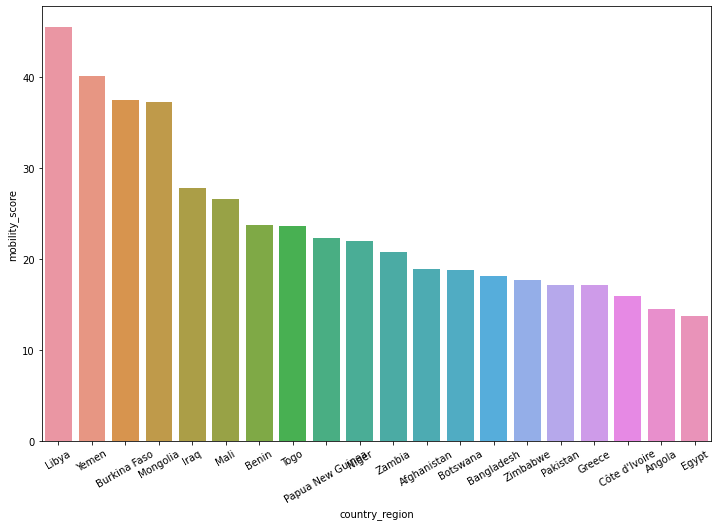

In [60]:
plt.figure(figsize=(12,8))
sns.barplot(x="country_region", y="mobility_score", data=mobilitas_mean.sort_values(by="mobility_score", ascending=False)[:20])
plt.xticks(rotation=30)
plt.show()

In [80]:
libya_confirm = data_ts[data_ts["Country/Region"]
                        == "Libya"]["Confirmed"].mean()
turkey_confirm = data_ts[data_ts["Country/Region"]
                         == "Turkey"]["Confirmed"].mean()

libya_population = 6_871_000 
turkey_population = 84_340_000
print(f"Libya confirmed cases : {libya_confirm} ; mobility score : {mobilitas_mean[mobilitas_mean['country_region'] == 'Libya']['mobility_score'].values[0]}")
print(f"Turkey confirmed cases : {turkey_confirm} ; mobility score : {mobilitas_mean[mobilitas_mean['country_region'] == 'Turkey']['mobility_score'].values[0]}")

print(f"Libya confirmed cases percentage : {libya_confirm/libya_population*100}%")
print(f"Turkey confirmed cases percentage : {turkey_confirm/turkey_population*100}%")

Libya confirmed cases : 68189.95833333333 ; mobility score : 45.51718910089275
Turkey confirmed cases : 1390878.5528089888 ; mobility score : 4.181106640215972
Libya confirmed cases percentage : 0.9924313539999029%
Turkey confirmed cases percentage : 1.6491327398731195%


# Catatan
1. Cari persentase dengan populasinya https://www.kaggle.com/datasets/tanuprabhu/population-by-country-2020